# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [5]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [6]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [7]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
normal,10000.0,19.991456,4.013850,4.310399,17.309638,19.98962,22.684324,35.704951
binomial,10000.0,20.097000,4.041191,6.000000,17.000000,20.00000,23.000000,36.000000


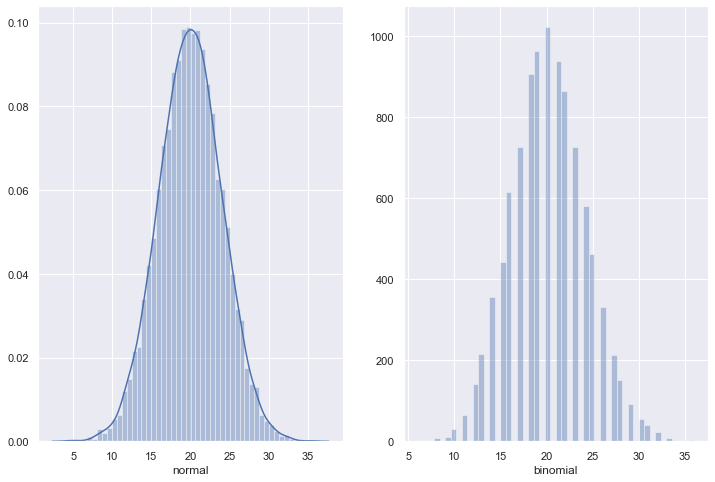

In [8]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(dataframe['normal'], ax=ax[0])
sns.distplot(dataframe['binomial'], kde=False, ax=ax[1]);

In [9]:
# Analisando os quartis da distribuição normal
normal = dataframe['normal']
np.quantile(normal, [0.25, 0.5, 0.75])

array([17.30963788, 19.9896201 , 22.68432355])

In [14]:
# Analisando os quartis da distribuição binomial
binomial = dataframe['binomial']
np.quantile(binomial, [0.25, 0.5, 0.75])

array([17., 20., 23.])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [15]:
def q1():
    q_normal = np.quantile(normal, [0.25, 0.5, 0.75])
    q_binomial = np.quantile(binomial, [0.25, 0.5, 0.75])
    result = (q_normal - q_binomial).round(3) 
    return tuple(result)
q1()


(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [24]:
def q2():
    limit1 = sct.norm.cdf(normal.mean() - normal.std(), loc=20, scale=4)
    limit2 = sct.norm.cdf(normal.mean() + normal.std(), loc=20, scale=4)
    result = (limit2 - limit1).round(3)
    return float(result)

q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [18]:
def q3():
    mean = round((binomial.mean() - normal.mean()), 3)
    variance = round((binomial.var() - normal.var()), 3)
    return mean, variance
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [19]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [60]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [61]:
stars.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_profile,17897.0,111.078321,25.652705,5.812500,100.929688,115.078125,127.085938,192.617188
sd_profile,17897.0,46.549021,6.843040,24.772042,42.375426,46.946435,51.022887,98.778911
kurt_profile,17897.0,0.477897,1.064056,-1.876011,0.027108,0.223241,0.473349,8.069522
skew_profile,17897.0,1.770417,6.168058,-1.791886,-0.188528,0.198736,0.928206,68.101622
mean_curve,17897.0,12.614926,29.473637,0.213211,1.923077,2.801839,5.464883,223.392140
sd_curve,17897.0,26.326918,19.471042,7.370432,14.437330,18.459977,28.428152,110.642211
kurt_curve,17897.0,8.303574,4.506217,-3.139270,5.781485,8.433872,10.702973,34.539844
skew_curve,17897.0,104.859419,106.517270,-1.976976,34.957119,83.068996,139.310905,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [20]:
def q4():
    false_pulsar = stars.mean_profile[stars.target==0]
    false_pulsar_mean_profile_standardized = (false_pulsar - false_pulsar.mean()) / false_pulsar.std()
    norm = sct.norm.ppf([0.8, 0.9, 0.95], loc=0, scale=1)
    cdf = ECDF(false_pulsar_mean_profile_standardized)
    
    return tuple(cdf(norm).round(3))
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [21]:
def q5():
    norm = sct.norm.ppf([0.25,0.5,0.75])
    false_pulsar = stars.mean_profile[stars.target==0]
    false_pulsar_mean_profile_standardized = (false_pulsar - false_pulsar.mean()) / false_pulsar.std()
    result =  np.quantile(false_pulsar_mean_profile_standardized, [0.25,0.5,0.75]) - norm
    
    return tuple(result.round(3))
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.